In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
dat = pd.read_csv('./StudentPerformanceFactors.csv')
dat = dat[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']]
dat

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
0,23,84,73,0,67
1,19,64,59,2,61
2,24,98,91,2,74
3,29,89,98,1,71
4,19,92,65,3,70
...,...,...,...,...,...
6602,25,69,76,1,68
6603,23,76,81,3,69
6604,20,90,65,3,68
6605,10,86,91,2,68


In [ ]:
# data preprocessing
X, y = dat[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']], dat[[ 'Exam_Score']]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #make sure not to leak information to test set

In [5]:
# Polynomial Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
degrees = [1,2,3,4]
for i in degrees:
    poly = PolynomialFeatures(degree = i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f'For Degree: {i} , our Train MSE: {train_mse}, Test MSE: {test_mse}, Train R2: {train_r2}, Test R2: {test_r2}')

For Degree: 1 , our Train MSE: 6.361797251640075, Test MSE: 5.069439258236874, Train R2: 0.5863849821854334, Test R2: 0.6413573918421556
For Degree: 2 , our Train MSE: 6.348348076927451, Test MSE: 5.084437280132165, Train R2: 0.5872593861342419, Test R2: 0.6402963416123899
For Degree: 3 , our Train MSE: 6.318106445722766, Test MSE: 5.091288170780315, Train R2: 0.5892255589521894, Test R2: 0.6398116684236808
For Degree: 4 , our Train MSE: 6.270753949026225, Test MSE: 5.156117061623398, Train R2: 0.5923042021390112, Test R2: 0.6352252829653352


In [6]:
import tensorflow.keras.models

In [19]:
# Neural Network
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


def create_model(learning_rate=0.001, regularization=0, momentum=0):
    model = Sequential()
    model.add(Dense(2, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(regularization)))
    model.add(Dense(1, activation='relu'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model
model = KerasRegressor(build_fn=create_model, epochs=10, verbose=0)
param_grid = {
    'batch_size': [16, 32],
    'learning_rate': [0.001, 0.01],
    'regularization': [0.001, 0.0001],
    'momentum': [0.0, 0.9]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
print("Best parameters found: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)

#Rebuild model with best hyperparameters
best_params = grid_result.best_params_
best_model = create_model(learning_rate=best_params['learning_rate'],regularization=best_params['regularization'], momentum=best_params['momentum'])
history = best_model.fit(X_train, y_train, epochs=10, batch_size=best_params['batch_size'], validation_data=(X_test, y_test))

C:\Users\corey\AppData\Local\Temp\ipykernel_15324\1658501066.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=10, verbose=0)


Best parameters found:  {'batch_size': 32, 'learning_rate': 0.001, 'momentum': 0.9, 'regularization': 0.001}
Best score:  -6.505130926767985
Epoch 1/10
166/166 [==============================] - 0s 979us/step - loss: 406.0618 - mse: 406.0581 - val_loss: 6.7178 - val_mse: 6.7163
Epoch 2/10
166/166 [==============================] - 0s 627us/step - loss: 7.7728 - mse: 7.7715 - val_loss: 5.1474 - val_mse: 5.1461
Epoch 3/10
166/166 [==============================] - 0s 631us/step - loss: 6.9085 - mse: 6.9072 - val_loss: 5.2520 - val_mse: 5.2509
Epoch 4/10
166/166 [==============================] - 0s 600us/step - loss: 6.9892 - mse: 6.9879 - val_loss: 6.1893 - val_mse: 6.1880
Epoch 5/10
166/166 [==============================] - 0s 620us/step - loss: 7.0092 - mse: 7.0079 - val_loss: 6.2832 - val_mse: 6.2818
Epoch 6/10
166/166 [==============================] - 0s 647us/step - loss: 7.7271 - mse: 7.7259 - val_loss: 8.0260 - val_mse: 8.0247
Epoch 7/10
166/166 [==============================]

Final Test MSE: 5.088005542755127
Final Test RMSE: 2.2556607774120483
42/42 [==============================] - 0s 342us/step


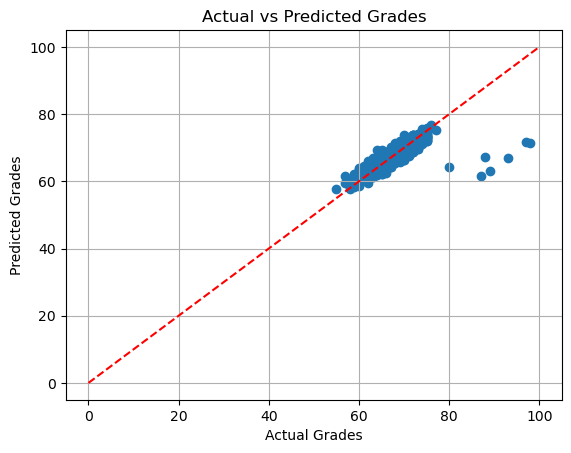

In [21]:
# Evaluate the model on the test set
final_test_mse = best_model.evaluate(X_test, y_test, verbose=0)[0]
final_test_rmse = np.sqrt(final_test_mse)
print(f"Final Test MSE: {final_test_mse}")
print(f"Final Test RMSE: {final_test_rmse}")

# Graph for actual vs predicted
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.plot([0, 100], [0, 100], 'r--')  
plt.grid(True)
plt.show()